# **Regression:**
Here I am going to share with you everything I know about **regression**.
All the information I gathered in these files was from free **educational resources** that I collected and improved with the help of my own knowledge.
A link to all the **resources** I used can be seen at the **end of this file**.
This collection is completely **free** and you can freely **share** it with other friends. I hope you can help increase your knowledge in **machine learning**.

## Contents: <a class="anchor" id="contents"></a>
* [What is Regression?](#what_is_regression)
* [Simple Linear Regression](#s_linear_regression)
* [Model Evaluation](#model_evaluation)
* [Multiple Linear Regression](#m_linear_regression)
* [Polynomial Regression](#poly_regression)
* [Non Linear Regression](#non_linear_regression)
* [Resources](#resources)

## -What is Regression? <a class="anchor" id="what_is_regression"></a>

**Regression** analysis is a **fundamental** concept in the field of **machine learning**. It falls under **supervised learning** wherein the algorithm is trained with both input features and output labels. It helps in establishing a relationship among the variables by estimating how one variable **affects** the other.

Imagine you're car shopping and have decided that gas mileage is a deciding factor in your decision to buy. If you wanted to **predict** the miles per gallon of some promising rides, how would you do it? Well, since you know the different **features** of the car (weight, horsepower, displacement, etc.) one possible method is **regression**. By plotting the average MPG of each car given its features you can then use regression techniques to find the relationship of the MPG and the input features. The regression function here could be represented as $Y = f(X)$, where **Y** would be the MPG and **X** would be the input features like the weight, displacement, horsepower, etc. The target function is $f$ and this curve helps us predict whether it’s beneficial to buy or not buy. This mechanism is called **regression**.

**Regression** in **machine learning** consists of **mathematical** methods that allow data scientists to **predict** a continuous outcome **(y)** based on the value of one or more predictor variables **(x)**. Linear regression is probably the most popular form of regression analysis because of its ease-of-use in predicting and forecasting.

* [go to contents](#contents)

## -Simple Linear Regression <a class="anchor" id="s_linear_regression"></a>

**Simple linear regression** allows us to predict the label using a **single** feature.

<img src="simple_reg_fo.png" width=610>

### Understanding the Data:

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

### Importing Packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use("seaborn-whitegrid")

### Reading The Dataset:

In [2]:
data = pd.read_csv("FuelConsumption.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data Exploration:
Let's first have a **descriptive** exploration on our data.

In [3]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Let's select some **features** to explore more.

In [4]:
data = data[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
data.head(9)

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,4,2.0,9.9,8.5,196
1,4,2.4,11.2,9.6,221
2,4,1.5,6.0,5.9,136
3,6,3.5,12.7,11.1,255
4,6,3.5,12.1,10.6,244
5,6,3.5,11.9,10.0,230
6,6,3.5,11.8,10.1,232
7,6,3.7,12.8,11.1,255
8,6,3.7,13.4,11.6,267


We can **plot** each of these features:

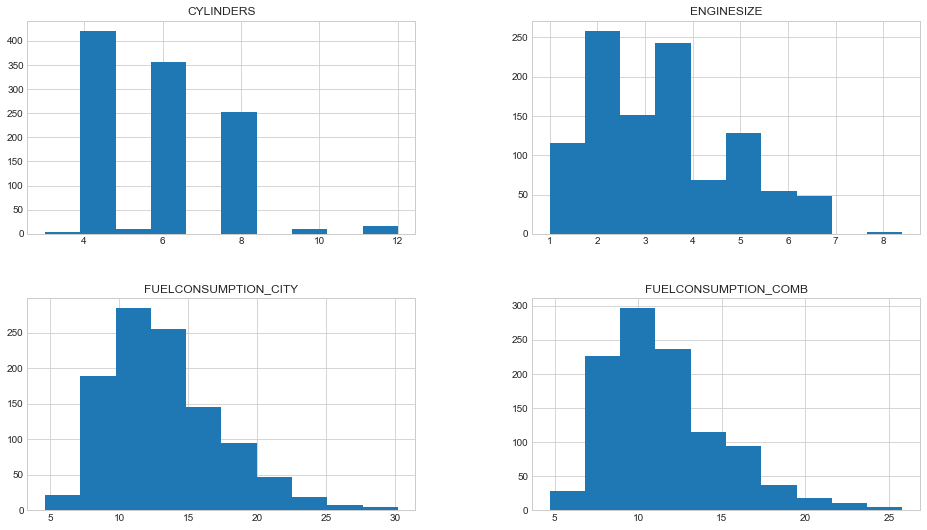

In [5]:
plt.rcParams["figure.figsize"] = (16, 9)
data[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB']].hist();
plt.show();

Now, let's plot **each of these features against the Emission**, to see how linear their relationship is:

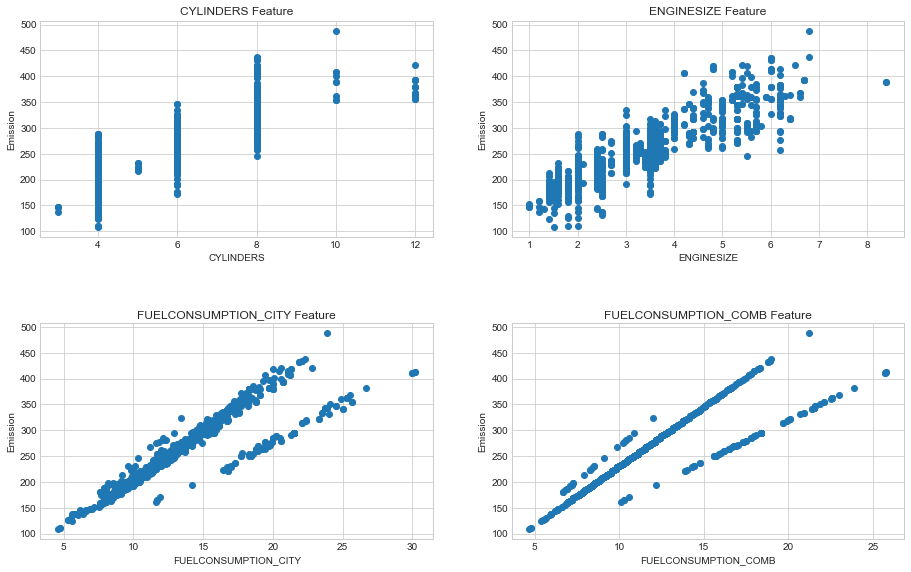

In [6]:
fig, ([ax1,ax2],[ax3, ax4]) = plt.subplots(2, 2, figsize=(15, 9))

ax1.scatter(x=data.CYLINDERS, y=data.CO2EMISSIONS)
ax1.set_xlabel("CYLINDERS")
ax1.set_ylabel("Emission")
ax1.set_title("CYLINDERS Feature")

ax2.scatter(x=data.ENGINESIZE, y=data.CO2EMISSIONS)
ax2.set_xlabel("ENGINESIZE")
ax2.set_ylabel("Emission")
ax2.set_title("ENGINESIZE Feature")

ax3.scatter(x=data.FUELCONSUMPTION_CITY, y=data.CO2EMISSIONS)
ax3.set_xlabel("FUELCONSUMPTION_CITY")
ax3.set_ylabel("Emission")
ax3.set_title("FUELCONSUMPTION_CITY Feature")

ax4.scatter(x=data.FUELCONSUMPTION_COMB, y=data.CO2EMISSIONS)
ax4.set_xlabel("FUELCONSUMPTION_COMB")
ax4.set_ylabel("Emission")
ax4.set_title("FUELCONSUMPTION_COMB Feature")

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, 
                    top=0.9, wspace=0.2, hspace=0.4)

plt.show()

### Creating Train and Test Data:

In [7]:
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

x_train = np.asanyarray(train[["ENGINESIZE"]])
y_train = np.asanyarray(train[["CO2EMISSIONS"]])

### Modeling:

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)

Coefficients:  [[38.64150654]]
Intercept:  [126.78041814]


### Plotting The Model:

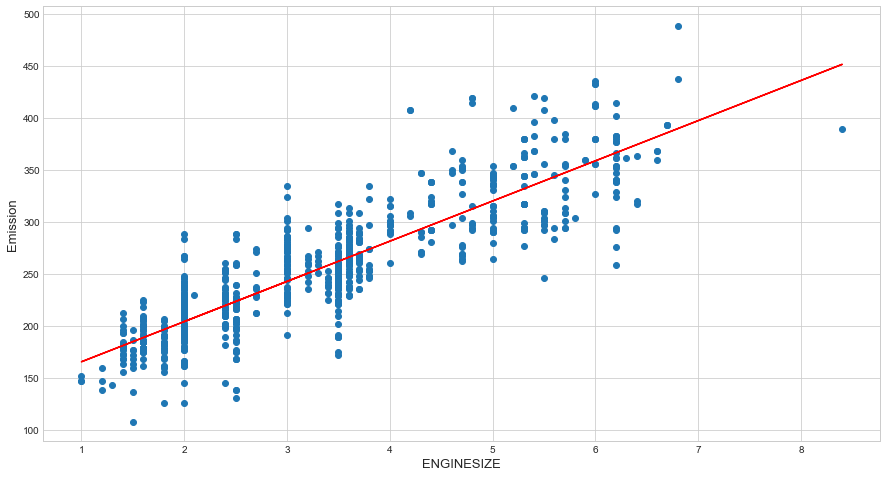

In [9]:
plt.rcParams["figure.figsize"] = (15, 8)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.plot(x_train, model.coef_[0][0] * x_train + model.intercept_[0], '-r')
plt.xlabel("ENGINESIZE", fontsize=13)
plt.ylabel("Emission", fontsize=13)
plt.show();

* [go to contents](#contents)


## -Model Evaluation <a class="anchor" id="model_evaluation"></a>

We compare the actual values and **predicted** values to calculate the **accuracy of a regression model**. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model **evaluation metrics**, lets use MSE here to calculate the accuracy of our model based on the test set:

*   **Mean Absolute Error(MAE)**: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error. <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/3ef87b78a9af65e308cf4aa9acf6f203efbdeded">


*   **Mean Squared Error(MSE)**: Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones. <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e">

*   **Root Mean Squared Error(RMSE)**.

*   **R-squared** is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [10]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
y_prim = model.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_prim - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_prim - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , y_prim) )

Mean absolute error: 24.89
Residual sum of squares (MSE): 1059.03
R2-score: 0.76


* [go to contents](#contents)


## -Multiple Linear Regression <a class="anchor" id="m_linear_regression"></a>
**Simple linear regression** allows us to predict the label using **multiple** features.

### Reading The Dataset:

In [11]:
data = pd.read_csv("FuelConsumption.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Creating Train and Test Data:

In [12]:
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

### Modeling:

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x_train = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
model.fit (x_train, y_train)
print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)

Coefficients:  [[10.6228337   7.324226    9.94831239]]
Intercept:  [63.39547609]


As mentioned before, **Coefficient** and **Intercept**  are the parameters of the fitted line.
Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

*   Solving the model parameters analytically using closed-form equations
*   Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)


### Prediction:

In [14]:
y_prim = model.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x_test = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])

print("Residual sum of squares: %.2f"
      % np.mean((y_prim - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model.score(x_test, y_test))

Residual sum of squares: 588.66
Variance score: 0.84


* [go to contents](#contents)


## -Polynomial Regression <a class="anchor" id="poly_regression"></a>

Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):

$$y = b + \theta\_1  x + \theta\_2 x^2$$

Now, the question is: how we can fit our data on this equation while we have only x values, such as **Engine Size**?
Well, we can create a few additional features: 1, $x$, and $x^2$.

**PolynomialFeatures()** function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, *ENGINESIZE*. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2:

### Reading The Dataset:

In [15]:
data = pd.read_csv("FuelConsumption.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Let's select some **features** that we want to use for **regression**.

In [16]:
data = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
data.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


### Creating Train and Test Data:

In [17]:
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

### Polynomial Features:

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x_train = np.asanyarray(train[['ENGINESIZE']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])

x_test = np.asanyarray(test[['ENGINESIZE']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)

x_train_poly = poly.fit_transform(x_train)

for i in range(5):
    print(f'{x_train[i]}  --->   {x_train_poly[i]}')

[2.]  --->   [1. 2. 4.]
[2.4]  --->   [1.   2.4  5.76]
[1.5]  --->   [1.   1.5  2.25]
[3.5]  --->   [ 1.    3.5  12.25]
[3.5]  --->   [ 1.    3.5  12.25]


**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

The equation and the sample example is displayed below.

$$
\begin{bmatrix}
v\_1\\\\
v\_2\\\\
\vdots\\\\
v_n
\end{bmatrix}\longrightarrow \begin{bmatrix}
\[ 1 & v\_1 & v\_1^2]\\\\
\[ 1 & v\_2 & v\_2^2]\\\\
\vdots & \vdots & \vdots\\\\
\[ 1 & v_n & v_n^2]
\end{bmatrix}
$$

$$
\begin{bmatrix}
2.\\\\
2.4\\\\
1.5\\\\
\vdots
\end{bmatrix} \longrightarrow \begin{bmatrix}
\[ 1 & 2. & 4.]\\\\
\[ 1 & 2.4 & 5.76]\\\\
\[ 1 & 1.5 & 2.25]\\\\
\vdots & \vdots & \vdots\\\\
\end{bmatrix}
$$


It looks like feature sets for multiple linear regression analysis, right? Yes. It Does.
Indeed, Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  $x$ with $x\_1$, $x\_1^2$ with $x\_2$, and so on. Then the degree 2 equation would be turn into:

$$y = b + \theta\_1  x\_1 + \theta\_2 x\_2$$

Now, we can deal with it as 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. So, you can use the same mechanism as linear regression to solve such a problems.

so we can use **LinearRegression()** function to solve it:


### Modeling:

In [19]:
model = LinearRegression()
model.fit(x_train_poly, y_train)
# The coefficients
print ('Coefficients: ', model.coef_)
print ('Intercept: ', model.intercept_)

Coefficients:  [[ 0.         50.21106618 -1.42028818]]
Intercept:  [106.51040218]


As mentioned before, **Coefficient** and **Intercept** , are the parameters of the fit curvy line.
Given that it is a typical multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn has estimated them from our new set of feature sets. Lets plot it:


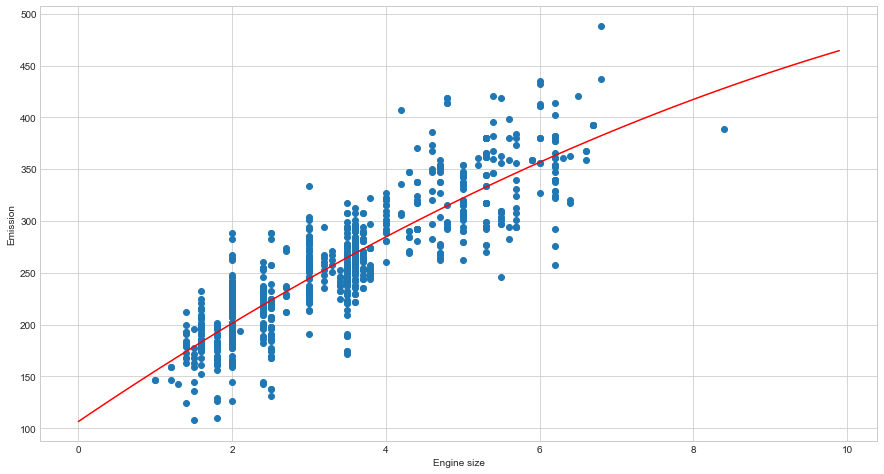

In [20]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
XX = np.arange(0.0, 10.0, 0.1)
yy = model.intercept_[0]+ model.coef_[0][1]*XX+ model.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show();

### Evaluation:

In [21]:
from sklearn.metrics import r2_score

x_test_poly = poly.fit_transform(x_test)
y_prim = model.predict(x_test_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_prim - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_prim - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test, y_prim))

Mean absolute error: 24.27
Residual sum of squares (MSE): 1007.16
R2-score: 0.73


* [go to contents](#contents)


## -Non Linear Regression <a class="anchor" id="non_linear_regression"></a>

If the data shows a **curvy trend**, then linear regression will not produce very **accurate** results when compared to a **non-linear** regression since linear regression presumes that the data is linear.
Let's learn about non linear regressions and apply an example in python. In this notebook, we fit a non-linear model to the datapoints corrensponding to **China's GDP** from **1960 to 2014**.

Although linear regression can do a great job at modeling some datasets, it cannot be used for **all datasets**. First recall how linear regression, models a dataset. It models the linear relationship between a **dependent variable y** and the **independent variables x**. It has a simple equation, of degree 1, for example y = $2x$ + 3.

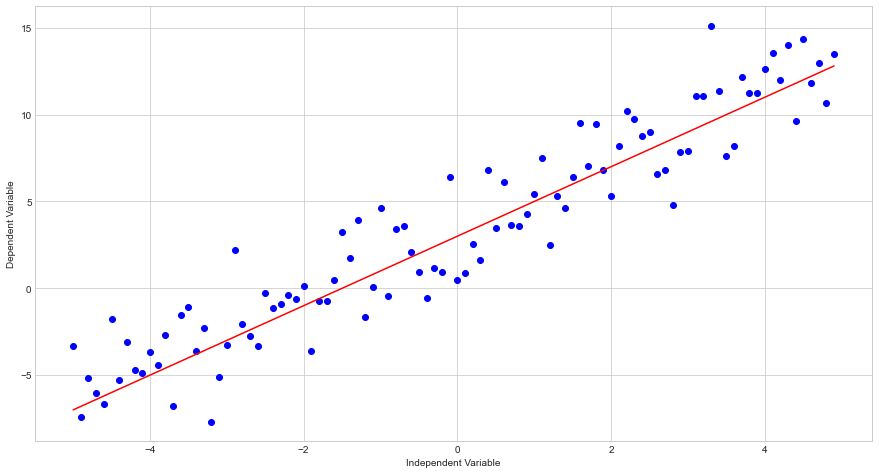

In [22]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show();

**Non-linear regression** is a method to model the non-linear relationship between the independent variables $x$ and the dependent variable $y$. Essentially any relationship that is **not linear** can be termed as non-linear, and is usually represented by the polynomial of $k$ degrees (maximum power of $x$).  For example:

$$ \ y = a x^3 + b x^2 + c x + d \ $$

Non-linear functions can have elements like **exponentials**, **logarithms**, f**ractions**, and so on. For example: $$ y = \log(x)$$

We can have a function that's even more **complicated** such as :
$$ y = \log(a x^3 + b x^2 + c x + d)$$


Let's take a look at a cubic function's graph.

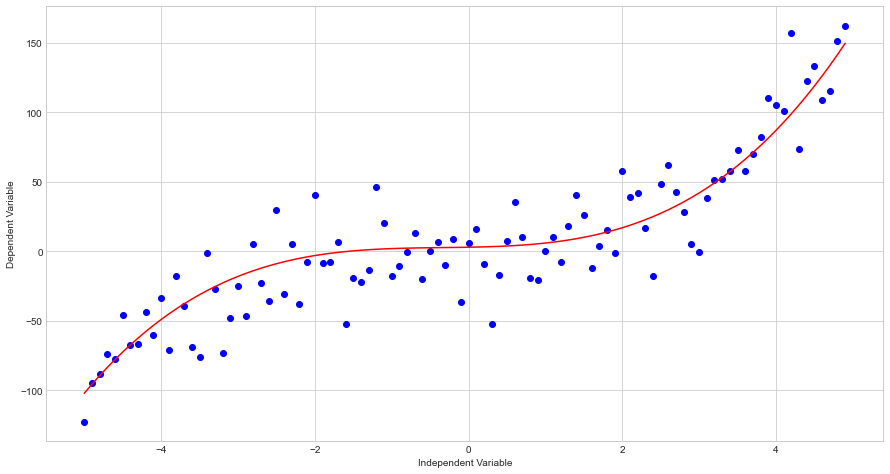

In [23]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show();

As you can see, this function has $x^3$ and $x^2$ as independent variables. Also, the graphic of this function is not a straight line over the 2D plane. So this is a non-linear function.


Some other types of non-linear functions are:

### Quadratic: $$ Y = X^2 $$

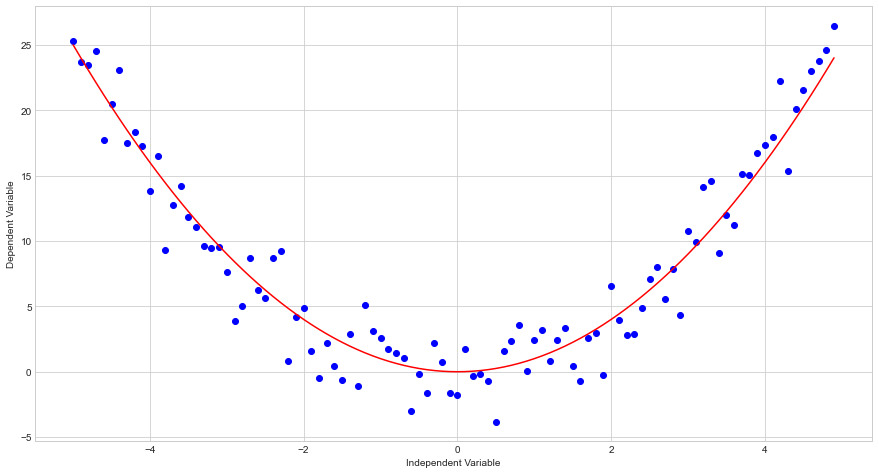

In [24]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show();

### Exponential: $$ Y = a + b c^X$$
where b ≠0, c > 0 , c ≠1, and x is any real number. The base, c, is constant and the exponent, x, is a variable.

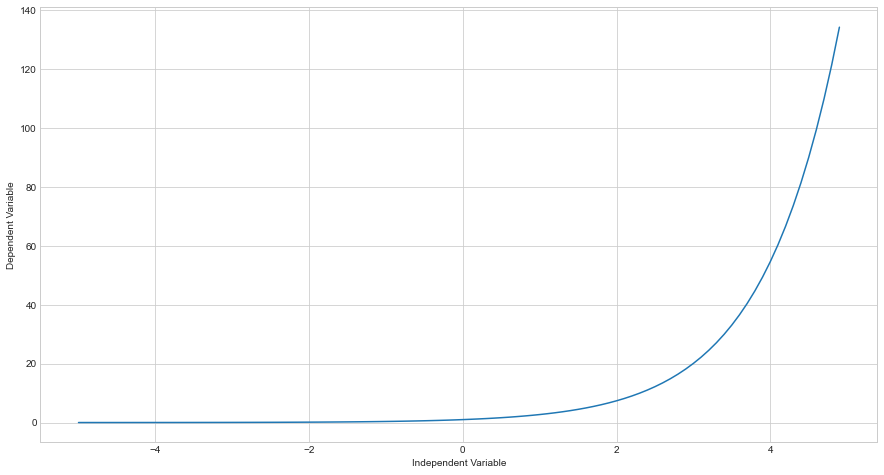

In [25]:
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
Y= np.exp(X)
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show();

### Logarithmic: $$ y = \log(x)$$

The response $y$ is a results of applying the logarithmic map from the input $x$ to the output $y$. It is one of the simplest form of **log()**: i.e. $$ y = \log(x)$$

Please consider that instead of $x$, we can use $X$, which can be a polynomial representation of the $x$ values. In general form it would be written as\
\begin{equation}
y = \log(X)
\end{equation}

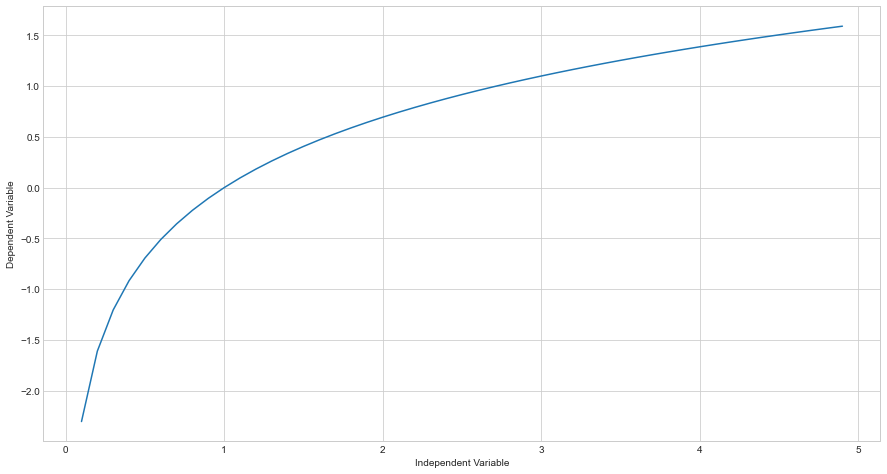

In [26]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show();

### Sigmoidal/Logistic: $$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

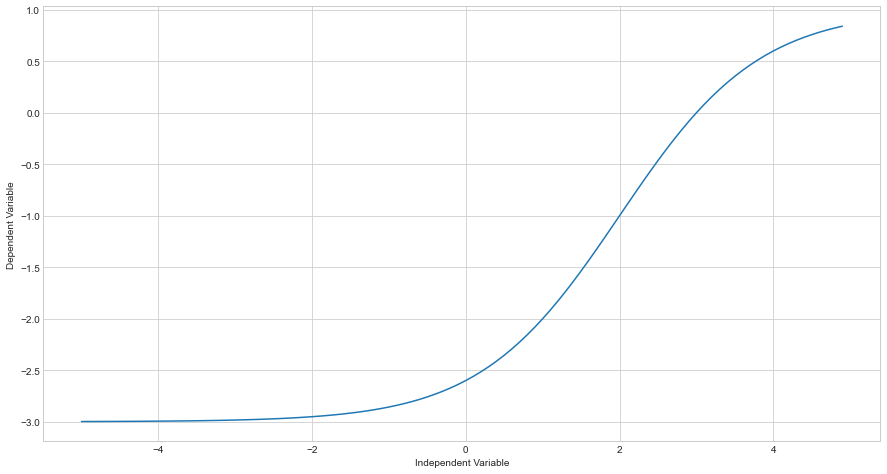

In [27]:
X = np.arange(-5.0, 5.0, 0.1)

Y = 1-4/(1+np.power(3, X-2))
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

For an example, we're going to try and fit a model to the datapoints corresponding to **China's GDP from 1960 to 2014**. We download a dataset with two columns, the first, a year between **1960 and 2014**, the second, **China's corresponding annual gross domestic income** in US dollars for that year.

### Reading The Dataset:

In [28]:
data = pd.read_csv("china_gdp.csv")
data.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


### Plotting The Dataset:
This is what the datapoints look like. It kind of looks like an either logistic or exponential function. The growth starts off slow, then from 2005 on forward, the growth is very significant. And finally, it decelerate slightly in the 2010s.

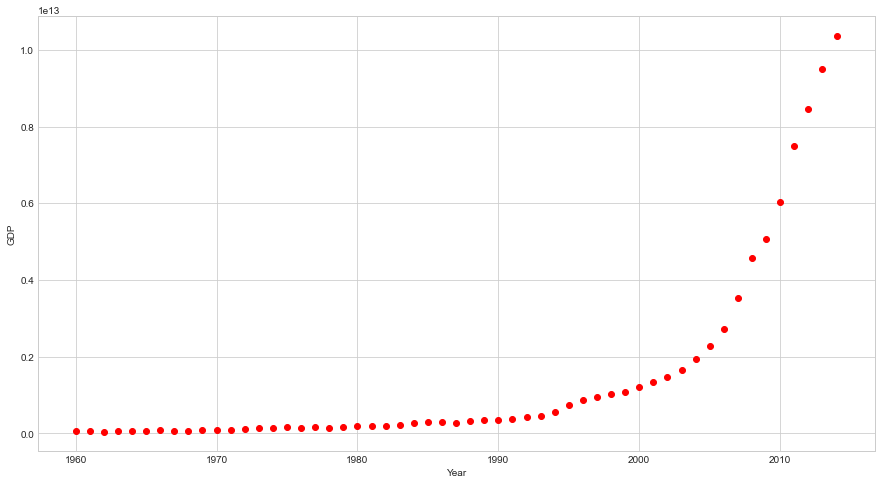

In [29]:
x_data, y_data = (data["Year"].values, data["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show();

### Choosing a model:

From an initial look at the plot, we determine that the logistic function could be a good approximation,
since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as illustrated below:


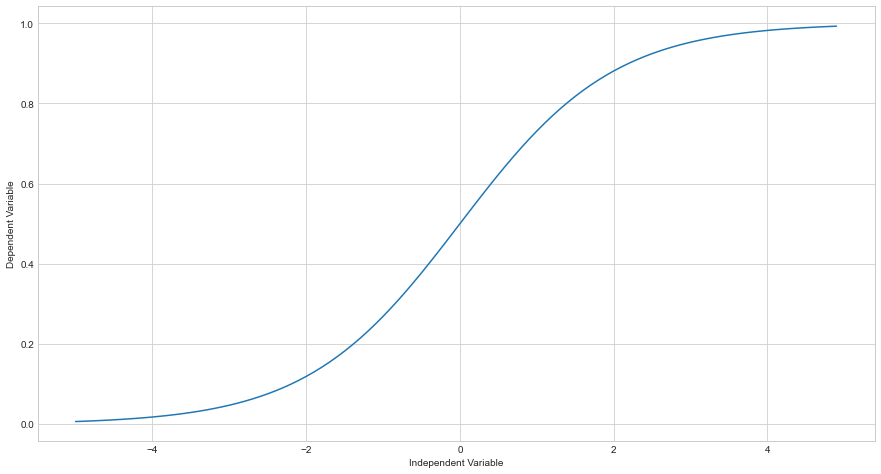

In [30]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show();

The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{\beta\_1(X-\beta\_2)}}$$

$\beta\_1$: Controls the curve's steepness,

$\beta\_2$: Slides the curve on the x-axis.

### Building The Model:

Now, let's build our regression model and initialize its parameters.


In [31]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Lets look at a sample sigmoid line that might fit with the data:

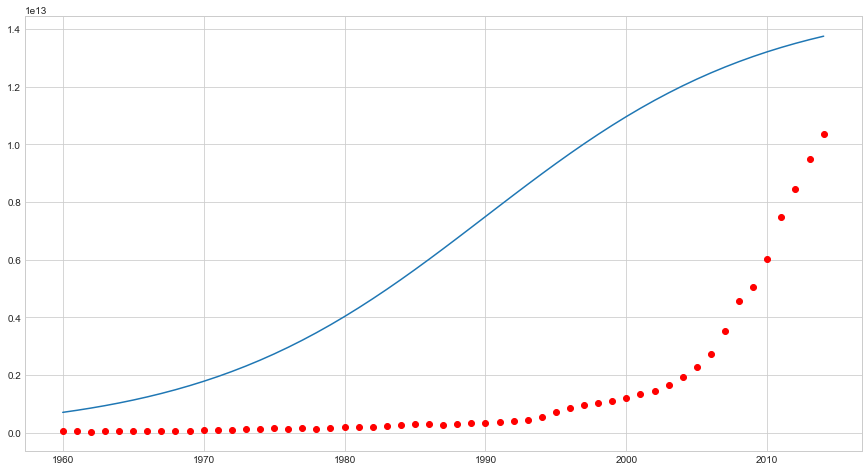

In [32]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')
plt.show();

Our task here is to find the best parameters for our model. Lets first normalize our x and y:

In [33]:
# Lets normalize our data
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

#### How we find the best parameters for our fit line?

we can use **curve_fit** which uses non-linear least squares to fit our sigmoid function, to data. Optimal values for the parameters so that the sum of the squared residuals of sigmoid(xdata, \*popt) - ydata is minimized.

popt are our optimized parameters.


In [34]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453018, beta_2 = 0.997207


Now we plot our resulting regression model.


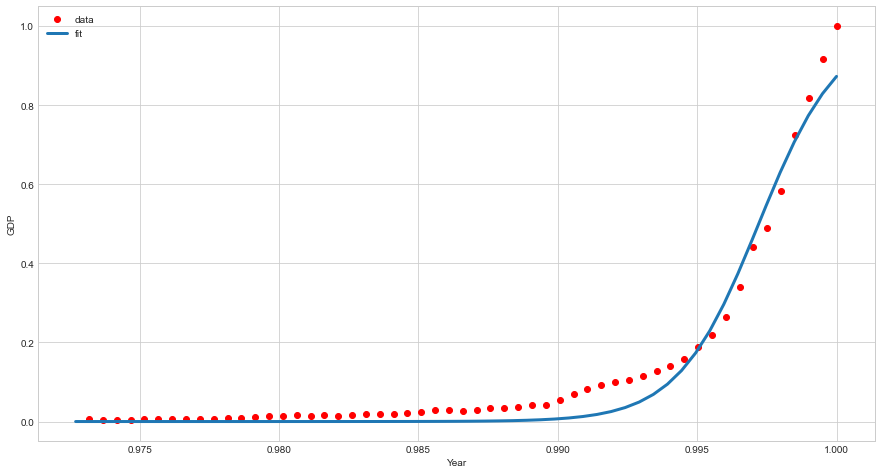

In [35]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)

y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')

plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show();

* [go to contents](#contents)

## -Resources: <a class="anchor" id="resources"></a>
   *    Edx IBM Developer Skills Network, Machine Learning Course With Saaed Aghabozorgi & Joseph Santarcangelo.
   *    Maktabkhooneh Machine Learning With Jadi Course.
   *    https://builtin.com/data-science/regression-machine-learning 

* [go to contents](#contents)